In [1]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

In [2]:
# a) Generation of the data
def generate_dataset(num_samples=1000):
    images = []
    labels = []

    for _ in range(num_samples):
        image = np.zeros((50, 50, 1), dtype=np.uint8)
        num_bars = 10
        is_vertical = np.random.randint(2)  # 0 for horizontal, 1 for vertical

        for _ in range(num_bars):
            bar_length = 10
            x_start = np.random.randint(41)  # Random starting position
            y_start = np.random.randint(41) if is_vertical else np.random.randint(41 - bar_length)

            if is_vertical:
                image[y_start:y_start + bar_length, x_start, 0] = 255
            else:
                image[y_start, x_start:x_start + bar_length, 0] = 255

        images.append(image)
        labels.append(is_vertical)


    # Show picture to check
    plt.imshow(images[0], cmap='gray')
    plt.title(f"Sample Picture Label: {labels[0]}")
    plt.axis('off')
    plt.show()


    return np.array(images), np.array(labels)

# b) Build the simplest possible CNN
def build_cnn():
    model = Sequential()
    model.add(Conv2D(1, (5, 5), input_shape=(50, 50, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))

    return model

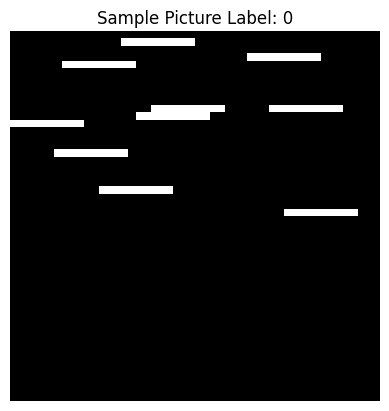

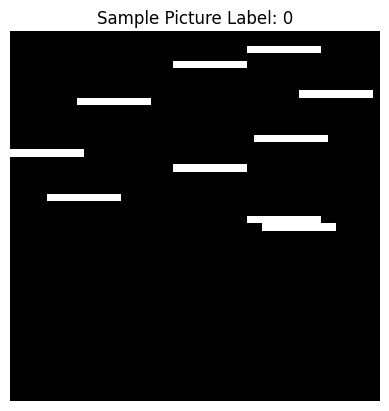

Epoch 1/20
32/32 [==============================] - 1s 13ms/step - loss: 11.0755 - accuracy: 0.7810 - val_loss: 3.2282 - val_accuracy: 0.9160
Epoch 2/20
32/32 [==============================] - 0s 10ms/step - loss: 1.8556 - accuracy: 0.9480 - val_loss: 1.6686 - val_accuracy: 0.9510
Epoch 3/20
32/32 [==============================] - 0s 8ms/step - loss: 0.9443 - accuracy: 0.9710 - val_loss: 1.3453 - val_accuracy: 0.9620
Epoch 4/20
32/32 [==============================] - 0s 9ms/step - loss: 0.5869 - accuracy: 0.9790 - val_loss: 1.1755 - val_accuracy: 0.9650
Epoch 5/20
32/32 [==============================] - 0s 9ms/step - loss: 0.4054 - accuracy: 0.9840 - val_loss: 1.1640 - val_accuracy: 0.9680
Epoch 6/20
32/32 [==============================] - 0s 9ms/step - loss: 0.2352 - accuracy: 0.9920 - val_loss: 1.0923 - val_accuracy: 0.9670
Epoch 7/20
32/32 [==============================] - 0s 9ms/step - loss: 0.1279 - accuracy: 0.9950 - val_loss: 1.0523 - val_accuracy: 0.9660
Epoch 8/20
32/32 

In [3]:
# Generate datasets
train_images, train_labels = generate_dataset(1000)
val_images, val_labels = generate_dataset(1000)

# Build and compile the model
model = build_cnn()
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

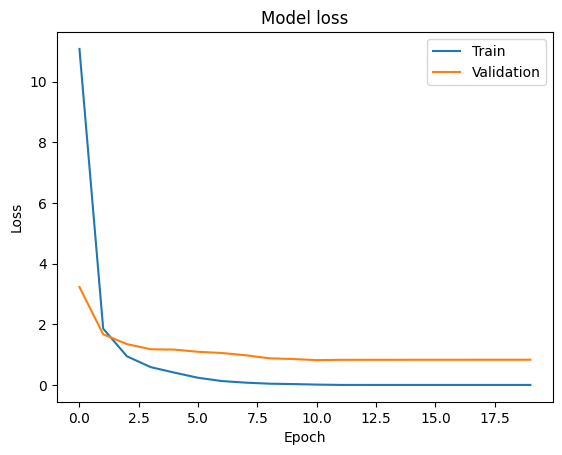

In [4]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

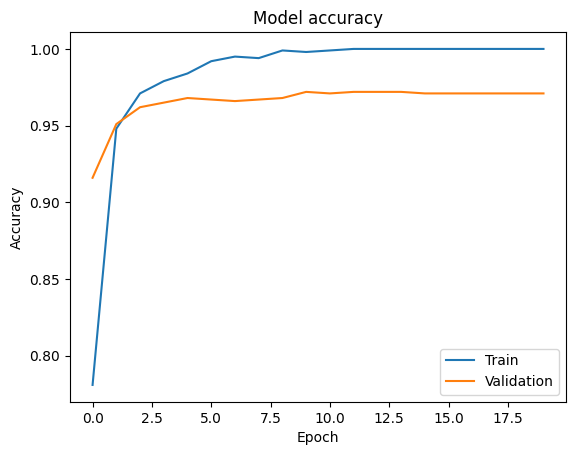

In [5]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

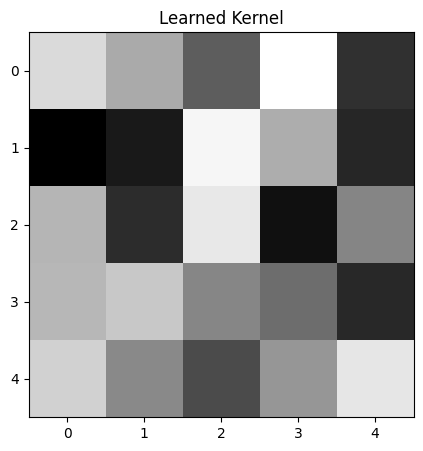

In [6]:
# c) Visualize the learned kernel
weights = model.get_weights()[0]
plt.figure(figsize=(5, 5))
plt.imshow(weights[:, :, 0, 0], cmap='gray', interpolation='nearest')
plt.title('Learned Kernel')
plt.show()